In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
import pandas as pd
data = pd.read_csv('/content/spotify_tracks.csv')

In [22]:
print(data.head())

                 track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1  h

In [23]:
data.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

In [24]:
data.shape

(62317, 22)

In [25]:
data.isna().sum()

,0
track_id,0
track_name,0
artist_name,0
year,0
popularity,0
artwork_url,0
album_name,0
acousticness,0
danceability,0
duration_ms,0


In [26]:
print(data.dtypes)

track_id             object
track_name           object
artist_name          object
year                  int64
popularity            int64
artwork_url          object
album_name           object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
track_url            object
language             object
dtype: object


In [27]:
data = data.dropna()  # Drop rows with any missing values


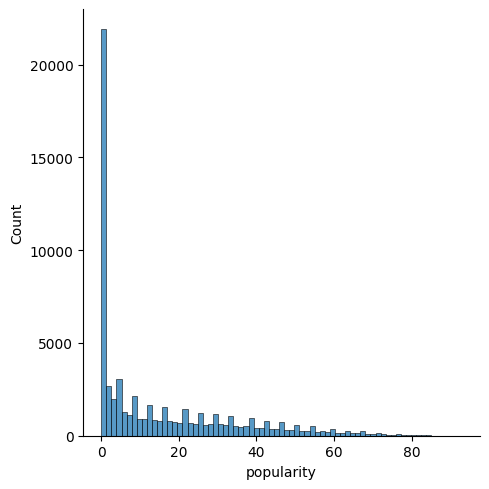

In [28]:
import seaborn as sns
sns.displot(data['popularity'])

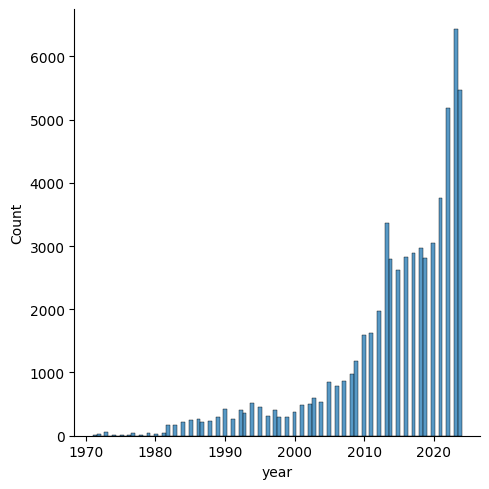

In [29]:
sns.displot(data['year'])

<ipython-input-30-3d04dd48c39a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='popularity', data=data, palette='Set2')


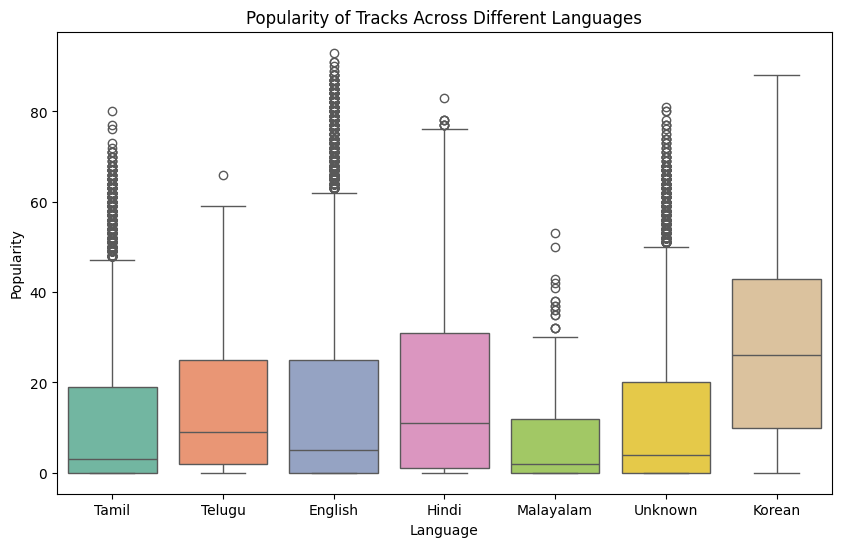

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the loaded dataset and has a 'language' and 'popularity' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='popularity', data=data, palette='Set2')
plt.title('Popularity of Tracks Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.show()


<ipython-input-31-ca08c36047e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language', y='danceability', data=data, palette='Set1')


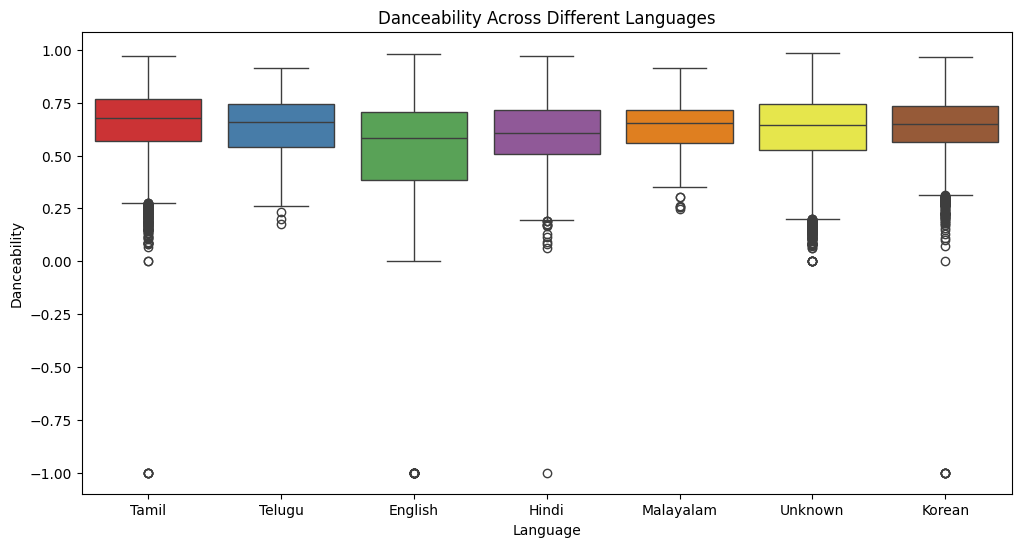

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='danceability', data=data, palette='Set1')
plt.title('Danceability Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Danceability')
plt.show()



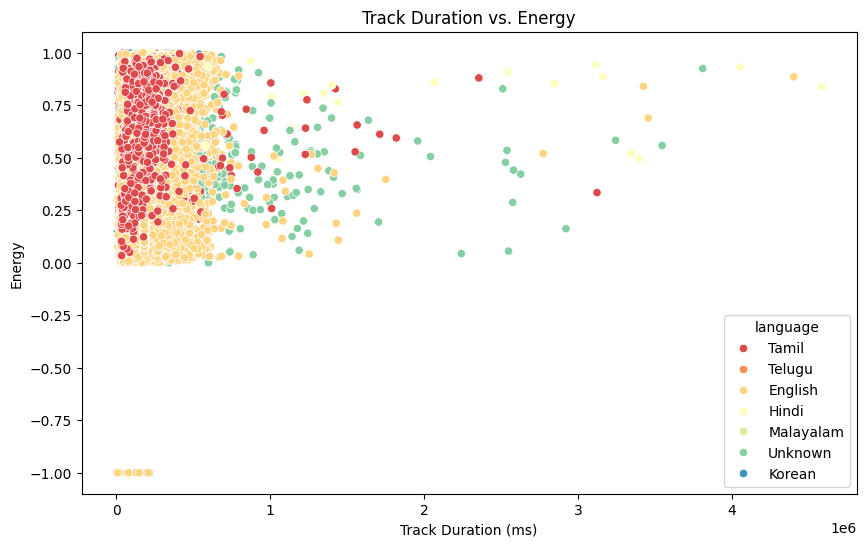

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='energy', data=data, hue='language', palette='Spectral')
plt.title('Track Duration vs. Energy')
plt.xlabel('Track Duration (ms)')
plt.ylabel('Energy')
plt.show()


<ipython-input-33-cf969c37d1a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language', data=data, palette='Set3')


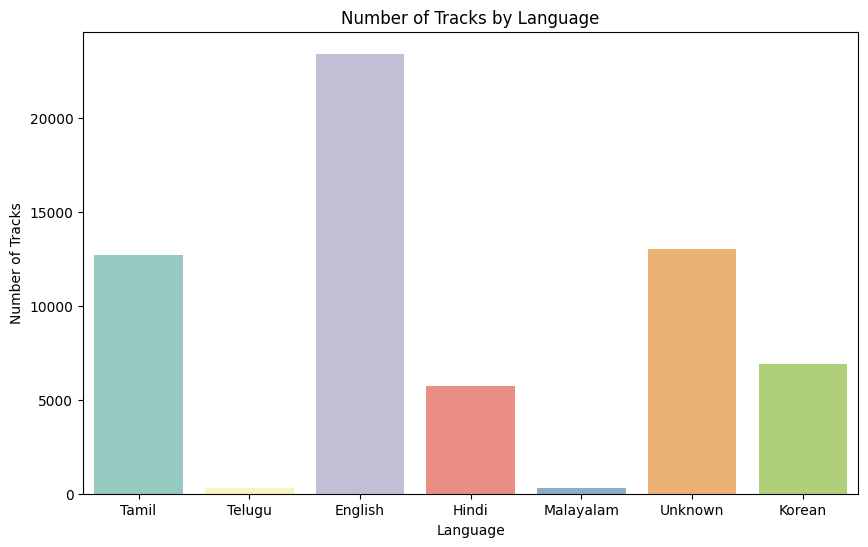

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=data, palette='Set3')
plt.title('Number of Tracks by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tracks')
plt.show()


<ipython-input-34-96f1a69c0ad1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_corr.index, y=popularity_corr.values, palette='coolwarm')


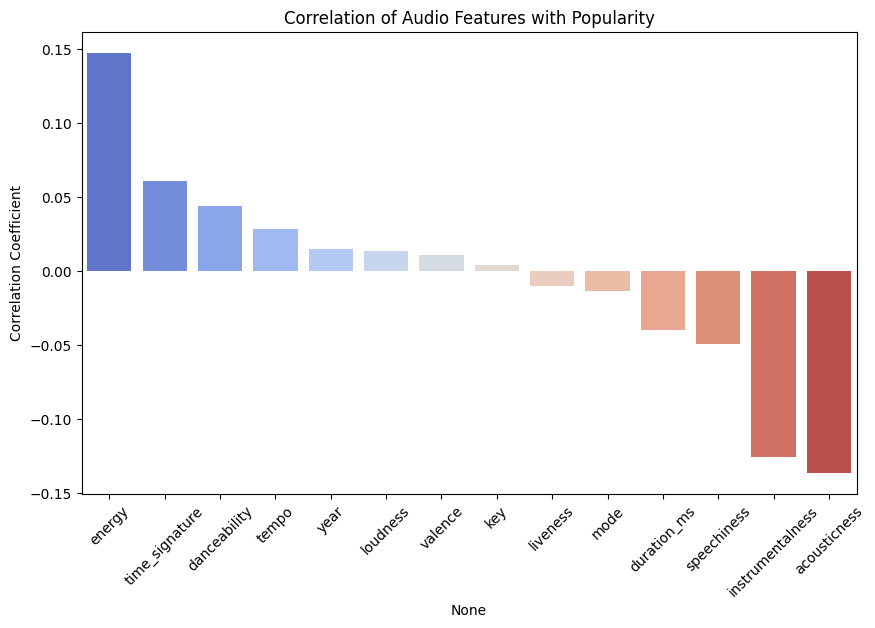

In [34]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
plt.figure(figsize=(10, 6))
popularity_corr = numeric_data.corr()['popularity'].drop('popularity').sort_values(ascending=False)

# Plot the correlation
sns.barplot(x=popularity_corr.index, y=popularity_corr.values, palette='coolwarm')
plt.title('Correlation of Audio Features with Popularity')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


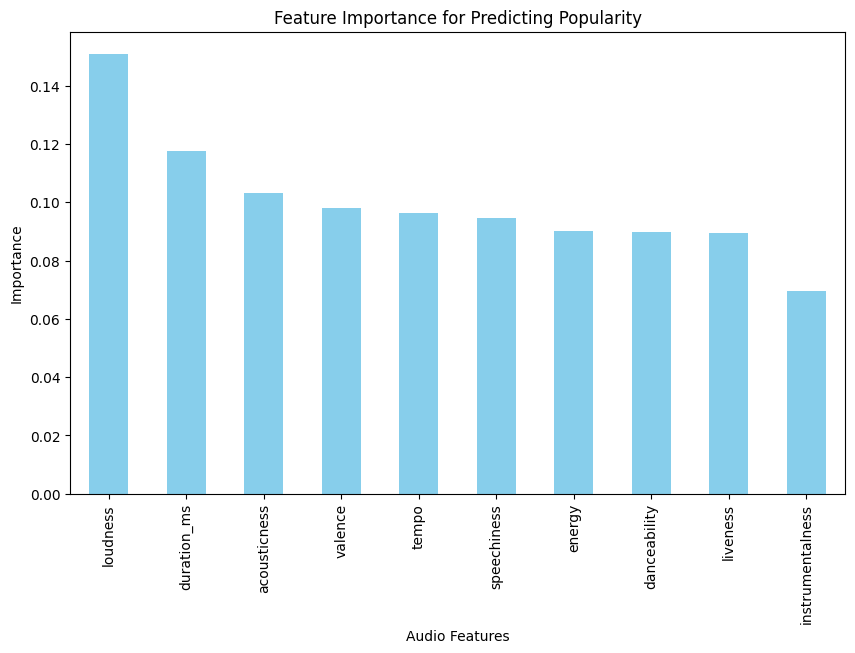

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the features and target
X = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = data['popularity']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Predicting Popularity')
plt.xlabel('Audio Features')
plt.ylabel('Importance')
plt.show()
